<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/academia/machineLearning/code/machine-learning_election-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime

start_time = datetime.now()

print('Excecution started at {}'.format(start_time))

Excecution started at 2021-07-25 06:17:58.567717


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')


import warnings
warnings.filterwarnings('ignore')

print("Imported the libraries for EDA")

Imported the libraries for EDA


### Data Dictionary
1. vote: Party choice: Conservative or Labour
2. age: in years
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5. Blair: Assessment of the Labour leader, 1 to 5.
6. Hague: Assessment of the Conservative leader, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
9. gender: female or male.

### Exploratoty Data Analysis

Read the data

In [3]:
raw_data = pd.read_excel('../data/Election_Data.xlsx', engine = 'openpyxl', sheet_name = 1)
raw_data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [5]:
raw_data.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [6]:
raw_data.describe(include = 'all')

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,NaN,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,763.000000,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,440.373894,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,1.000000,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,382.000000,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,763.000000,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,1144.000000,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [7]:
data = raw_data.copy()
data.columns = ['respondent_id', 'vote', 'age', 'nat_eco_rat',
       'hh_eco_rat', 'blair', 'hague', 'europe',
       'party_stance', 'gender']

In [8]:
dup =  data[['vote', 'age', 'nat_eco_rat',
       'hh_eco_rat', 'blair', 'hague', 'europe',
       'party_stance', 'gender']].duplicated()
data[dup]

,respondent_id,vote,age,nat_eco_rat,hh_eco_rat,blair,hague,europe,party_stance,gender
67,68,Labour,35,4,4,5,2,3,2,male
626,627,Labour,39,3,4,4,2,5,2,male
870,871,Labour,38,2,4,2,2,4,3,male
983,984,Conservative,74,4,3,2,4,8,2,female
1154,1155,Conservative,53,3,4,2,2,6,0,female
1236,1237,Labour,36,3,3,2,2,6,2,female
1244,1245,Labour,29,4,4,4,2,2,2,female
1438,1439,Labour,40,4,3,4,2,2,2,male


There are duplicates is the data which will be removed at a later stage before model building

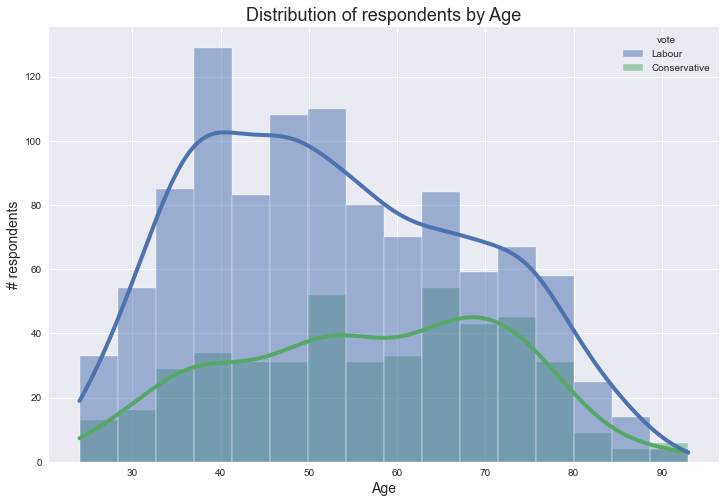

In [9]:
fig = plt.subplots(figsize=(12,8)); sns.set_style('whitegrid')
sns.histplot(x=data['age'], hue=data['vote'], kde=True, line_kws={'lw':4})
plt.title('Distribution of respondents by Age', fontsize=18); plt.xlabel('Age', fontsize=14); plt.ylabel('# respondents', fontsize=14);
plt.show()

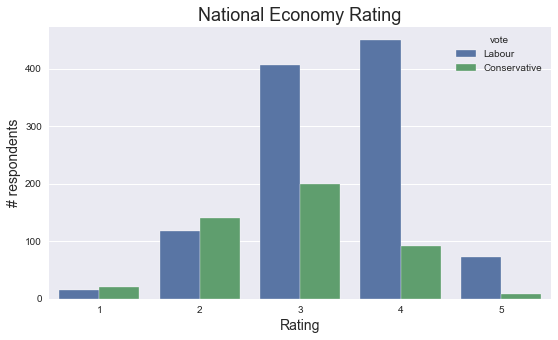

respondent_id
                                 count
nat_eco_rat vote                      
1           Conservative           4.5
            Labour                 1.5
2           Conservative          30.3
            Labour                11.0
3           Conservative          43.3
            Labour                38.3
4           Conservative          19.9
            Labour                42.3
5           Conservative           1.9
            Labour                 6.9

In [10]:
plt.style.use('seaborn') 
fig = plt.subplots(figsize=(9,5))
sns.countplot(x=data['nat_eco_rat'], hue=data['vote'])
plt.title('National Economy Rating', fontsize=18); plt.xlabel('Rating', fontsize=14); plt.ylabel('# respondents', fontsize=14)
plt.show()
display(round(data[['respondent_id','nat_eco_rat','vote']].groupby(['nat_eco_rat','vote']).agg(['count'])/data[['respondent_id','vote']].groupby(['vote']).agg(['count'])*100,1))

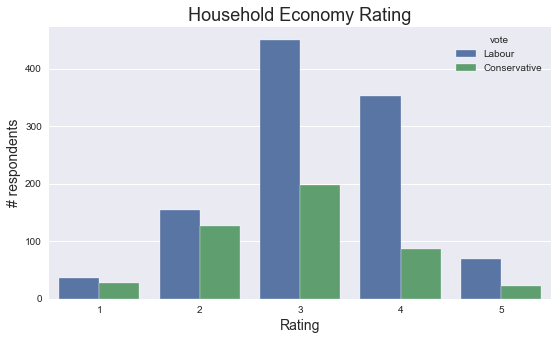

respondent_id
                                count
hh_eco_rat vote                      
1          Conservative           6.1
           Labour                 3.5
2          Conservative          27.3
           Labour                14.5
3          Conservative          42.9
           Labour                42.3
4          Conservative          18.8
           Labour                33.2
5          Conservative           5.0
           Labour                 6.5

In [11]:
fig = plt.subplots(figsize=(9,5))
sns.countplot(x=data['hh_eco_rat'], hue=data['vote'])
plt.title('Household Economy Rating', fontsize=18); plt.xlabel('Rating', fontsize=14); plt.ylabel('# respondents', fontsize=14);
plt.show()
display(round(data[['respondent_id','hh_eco_rat','vote']].groupby(['hh_eco_rat','vote']).agg(['count'])/data[['respondent_id','vote']].groupby(['vote']).agg(['count'])*100,1))

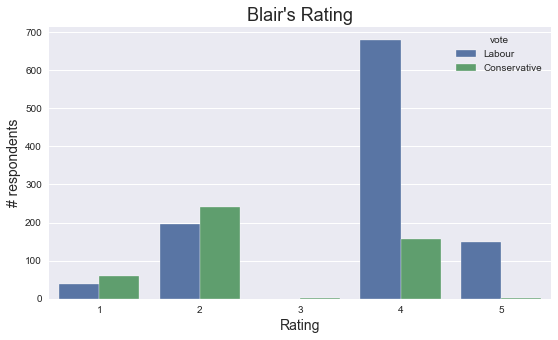

respondent_id
                           count
blair vote                      
1     Conservative          12.8
      Labour                 3.6
2     Conservative          52.4
      Labour                18.4
3     Conservative           0.2
4     Conservative          34.0
      Labour                63.9
5     Conservative           0.6
      Labour                14.1

In [12]:
fig = plt.subplots(figsize=(9,5))
sns.countplot(x=data['blair'], hue=data['vote'])
plt.title("Blair's Rating", fontsize=18); plt.xlabel('Rating', fontsize=14); plt.ylabel('# respondents', fontsize=14);
plt.show()
display(round(data[['respondent_id','blair','vote']].groupby(['blair','vote']).agg(['count'])/data[['respondent_id','vote']].groupby(['vote']).agg(['count'])*100,1))

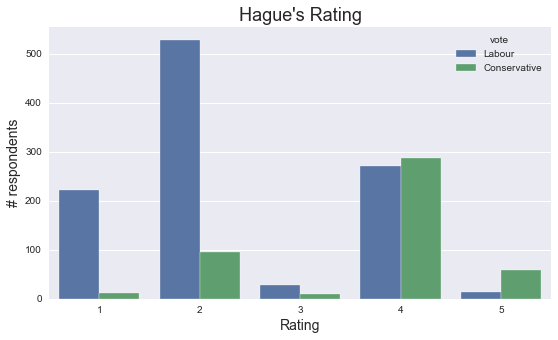

respondent_id
                           count
hague vote                      
1     Conservative           2.4
      Labour                20.9
2     Conservative          20.8
      Labour                49.7
3     Conservative           1.9
      Labour                 2.6
4     Conservative          62.1
      Labour                25.5
5     Conservative          12.8
      Labour                 1.3

In [13]:
fig = plt.subplots(figsize=(9,5))
sns.countplot(x=data['hague'], hue=data['vote'])
plt.title("Hague's Rating", fontsize=18); plt.xlabel('Rating', fontsize=14); plt.ylabel('# respondents', fontsize=14);
plt.show()
display(round(data[['respondent_id','hague','vote']].groupby(['hague','vote']).agg(['count'])/data[['respondent_id','vote']].groupby(['vote']).agg(['count'])*100,1))

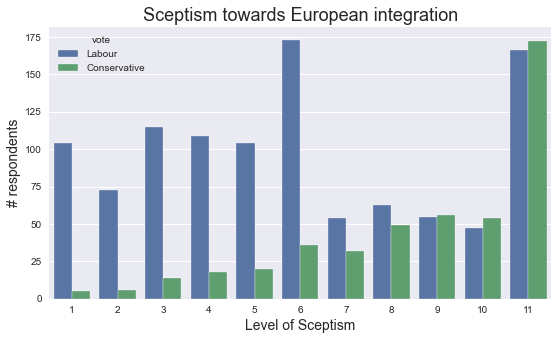

respondent_id
                            count
europe vote                      
1      Conservative           1.1
       Labour                 9.8
2      Conservative           1.3
       Labour                 6.9
3      Conservative           3.0
       Labour                10.8
4      Conservative           3.9
       Labour                10.3
5      Conservative           4.3
       Labour                 9.8
6      Conservative           7.8
       Labour                16.3
7      Conservative           6.9
       Labour                 5.1
8      Conservative          10.6
       Labour                 5.9
9      Conservative          12.1
       Labour                 5.2
10     Conservative          11.7
       Labour                 4.4
11     Conservative          37.2
       Labour                15.6

In [14]:
fig = plt.subplots(figsize=(9,5))
sns.countplot(x=data['europe'], hue=data['vote'])
plt.title("Sceptism towards European integration", fontsize=18); plt.xlabel('Level of Sceptism', fontsize=14); plt.ylabel('# respondents', fontsize=14);
plt.show()
display(round(data[['respondent_id','europe','vote']].groupby(['europe','vote']).agg(['count'])/data[['respondent_id','vote']].groupby(['vote']).agg(['count'])*100,1))

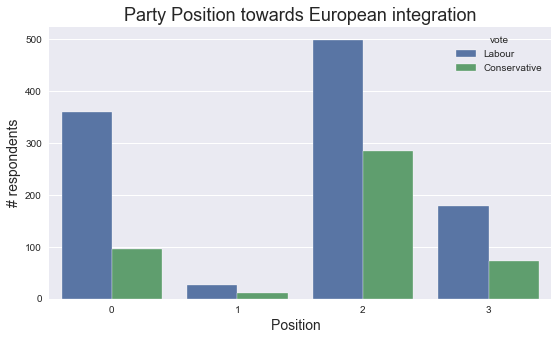

respondent_id
                                  count
party_stance vote                      
0            Conservative          20.6
             Labour                33.9
1            Conservative           2.4
             Labour                 2.5
2            Conservative          61.5
             Labour                46.8
3            Conservative          15.6
             Labour                16.7

In [15]:
fig = plt.subplots(figsize=(9,5))
sns.countplot(x=data['party_stance'], hue=data['vote'])
plt.title("Party Position towards European integration", fontsize=18); plt.xlabel('Position  ', fontsize=14); plt.ylabel('# respondents', fontsize=14);
plt.show()
display(round(data[['respondent_id','party_stance','vote']].groupby(['party_stance','vote']).agg(['count'])/data[['respondent_id','vote']].groupby(['vote']).agg(['count'])*100,1))

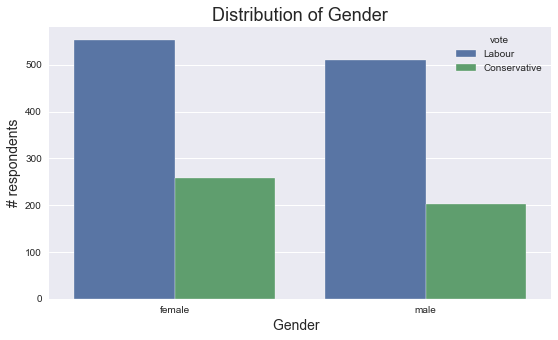

respondent_id
                            count
gender vote                      
female Conservative          56.1
       Labour                52.0
male   Conservative          43.9
       Labour                48.0

In [16]:
fig = plt.subplots(figsize=(9,5))
sns.countplot(x=data['gender'], hue=data['vote'])
plt.title("Distribution of Gender", fontsize=18); plt.xlabel('Gender  ', fontsize=14); plt.ylabel('# respondents', fontsize=14);
plt.show()
display(round(data[['respondent_id','gender','vote']].groupby(['gender','vote']).agg(['count'])/data[['respondent_id','vote']].groupby(['vote']).agg(['count'])*100,1))

In [17]:
import scipy.stats as stats

crstb_1 = pd.crosstab(data['nat_eco_rat'],data['blair'])
print(crstb_1)
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

blair         1    2  3    4   5
nat_eco_rat                     
1            10   18  0    8   1
2            38  103  0  111   5
3            32  203  0  326  46
4            17  100  1  351  73
5             0   14  0   40  28
The observed frequencies are:
 [[ 10  18   0   8   1]
 [ 38 103   0 111   5]
 [ 32 203   0 326  46]
 [ 17 100   1 351  73]
 [  0  14   0  40  28]] 

The test statistic: 216.20724623017517
The p-value of the test: 4.115537209409887e-37
The degrees of freedom of the test: 16
The expected frequencies, based on the marginal sums of the table:
 [[  2  11   0  20   4]
 [ 16  74   0 141  26]
 [ 39 174   0 333  61]
 [ 34 156   0 297  54]
 [  5  24   0  45   8]]
Reject H0: The variables are correlated.


In [18]:
crstb_1 = pd.crosstab(data['hh_eco_rat'],data['blair'])
print(crstb_1)
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

blair        1    2  3    4   5
hh_eco_rat                     
1           10   23  0   31   1
2           30  107  0  129  14
3           34  201  1  351  61
4           17   95  0  275  53
5            6   12  0   50  24
The observed frequencies are:
 [[ 10  23   0  31   1]
 [ 30 107   0 129  14]
 [ 34 201   1 351  61]
 [ 17  95   0 275  53]
 [  6  12   0  50  24]] 

The test statistic: 96.94422833858934
The p-value of the test: 1.2909350254978566e-13
The degrees of freedom of the test: 16
The expected frequencies, based on the marginal sums of the table:
 [[  4  19   0  36   7]
 [ 18  80   0 153  28]
 [ 41 186   0 355  65]
 [ 28 126   0 241  44]
 [  6  26   0  50   9]]
Reject H0: The variables are correlated.


In [19]:
crstb_1 = pd.crosstab(data['nat_eco_rat'],data['hague'])
print(crstb_1)
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

hague         1    2   3    4   5
nat_eco_rat                      
1             2    8   1   23   3
2            22   84   7  126  18
3            91  240  18  230  28
4            96  254  10  163  19
5            22   38   1   16   5
The observed frequencies are:
 [[  2   8   1  23   3]
 [ 22  84   7 126  18]
 [ 91 240  18 230  28]
 [ 96 254  10 163  19]
 [ 22  38   1  16   5]] 

The test statistic: 70.77167467790485
The p-value of the test: 7.3073663164757154e-09
The degrees of freedom of the test: 16
The expected frequencies, based on the marginal sums of the table:
 [[  6  15   1  14   2]
 [ 39 105   6  94  12]
 [ 93 248  15 222  29]
 [ 83 222  13 198  26]
 [ 13  34   2  30   4]]
Reject H0: The variables are correlated.


In [20]:
crstb_1 = pd.crosstab(data['hh_eco_rat'],data['hague'])
print(crstb_1)
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

hague         1    2   3    4   5
hh_eco_rat                       
1             7   22   1   31   4
2            31  104   8  117  20
3           105  252  22  240  29
4            72  215   5  134  14
5            18   31   1   36   6
The observed frequencies are:
 [[  7  22   1  31   4]
 [ 31 104   8 117  20]
 [105 252  22 240  29]
 [ 72 215   5 134  14]
 [ 18  31   1  36   6]] 

The test statistic: 38.48856832540426
The p-value of the test: 0.0012884408024243827
The degrees of freedom of the test: 16
The expected frequencies, based on the marginal sums of the table:
 [[ 10  27   2  24   3]
 [ 43 115   7 102  13]
 [ 99 265  16 237  31]
 [ 67 180  11 161  21]
 [ 14  38   2  34   4]]
Reject H0: The variables are correlated.


In [21]:
crstb_1 = pd.crosstab(data['gender'],data['blair'])
print(crstb_1)
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

blair    1    2  3    4   5
gender                     
female  52  258  0  433  69
male    45  180  1  403  84
The observed frequencies are:
 [[ 52 258   0 433  69]
 [ 45 180   1 403  84]] 

The test statistic: 11.564560729248491
The p-value of the test: 0.02090081799510881
The degrees of freedom of the test: 4
The expected frequencies, based on the marginal sums of the table:
 [[ 52 233   1 445  81]
 [ 45 205   0 391  72]]
Reject H0: The variables are correlated.


In [22]:
crstb_1 = pd.crosstab(data['gender'],data['hague'])
print(crstb_1)
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

hague     1    2   3    4   5
gender                       
female  112  332  24  310  34
male    121  292  13  248  39
The observed frequencies are:
 [[112 332  24 310  34]
 [121 292  13 248  39]] 

The test statistic: 7.0160498121713815
The p-value of the test: 0.13504249327663714
The degrees of freedom of the test: 4
The expected frequencies, based on the marginal sums of the table:
 [[124 332  20 297  39]
 [109 292  17 261  34]]
Accept H0: The variables are independent.


In [23]:
crstb_1 = pd.crosstab(data['vote'],data['nat_eco_rat'])
print(crstb_1)
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

nat_eco_rat    1    2    3    4   5
vote                               
Conservative  21  140  200   92   9
Labour        16  117  407  450  73
The observed frequencies are:
 [[ 21 140 200  92   9]
 [ 16 117 407 450  73]] 

The test statistic: 145.48418462994104
The p-value of the test: 1.88897478759981e-30
The degrees of freedom of the test: 4
The expected frequencies, based on the marginal sums of the table:
 [[ 11  78 184 164  25]
 [ 26 179 423 378  57]]
Reject H0: The variables are correlated.


In [24]:
crstb_1 = pd.crosstab(data['vote'],data['hh_eco_rat'])
print(crstb_1)
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

hh_eco_rat     1    2    3    4   5
vote                               
Conservative  28  126  198   87  23
Labour        37  154  450  353  69
The observed frequencies are:
 [[ 28 126 198  87  23]
 [ 37 154 450 353  69]] 

The test statistic: 58.012210492193184
The p-value of the test: 7.586093275948135e-12
The degrees of freedom of the test: 4
The expected frequencies, based on the marginal sums of the table:
 [[ 20  85 196 133  28]
 [ 45 195 452 307  64]]
Reject H0: The variables are correlated.


In [25]:
crstb_1 = pd.crosstab(data['vote'],data['europe'])
print(crstb_1)
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

europe         1   2    3    4    5    6   7   8   9   10   11
vote                                                          
Conservative    5   6   14   18   20   36  32  49  56  54  172
Labour        104  73  115  109  104  173  54  63  55  47  166
The observed frequencies are:
 [[  5   6  14  18  20  36  32  49  56  54 172]
 [104  73 115 109 104 173  54  63  55  47 166]] 

The test statistic: 247.2573864869924
The p-value of the test: 2.0472514408905497e-47
The degrees of freedom of the test: 10
The expected frequencies, based on the marginal sums of the table:
 [[ 33  24  39  38  38  63  26  34  34  31 102]
 [ 76  55  90  89  86 146  60  78  77  70 236]]
Reject H0: The variables are correlated.


In [26]:
crstb_1 = pd.crosstab(data['vote'],data['party_stance'])
print(crstb_1)
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

party_stance    0   1    2    3
vote                           
Conservative   95  11  284   72
Labour        360  27  498  178
The observed frequencies are:
 [[ 95  11 284  72]
 [360  27 498 178]] 

The test statistic: 32.82998736820569
The p-value of the test: 3.497883904285619e-07
The degrees of freedom of the test: 3
The expected frequencies, based on the marginal sums of the table:
 [[138  12 237  76]
 [317  26 545 174]]
Reject H0: The variables are correlated.


In [27]:
data.drop('respondent_id', axis=1, inplace=True)

In [28]:
data.drop_duplicates(keep='first', inplace=True)

In [29]:
data.reset_index().drop('index',axis=1, inplace=True); data.sample(10)

,vote,age,nat_eco_rat,hh_eco_rat,blair,hague,europe,party_stance,gender
1230,Labour,39,3,5,4,1,1,2,female
715,Labour,67,4,3,5,2,2,2,male
832,Labour,42,4,4,4,2,4,2,male
542,Conservative,66,3,3,2,4,5,0,male
728,Labour,42,4,4,2,2,6,2,female
41,Labour,48,3,2,4,2,4,0,female
1442,Conservative,68,2,3,2,4,10,2,female
411,Labour,24,4,4,4,2,4,2,female
215,Conservative,34,1,1,1,4,11,3,male
3,Labour,24,4,2,2,1,4,0,female


In [30]:
data = pd.get_dummies(data, columns=['gender']); data.head()

,vote,age,nat_eco_rat,hh_eco_rat,blair,hague,europe,party_stance,gender_female,gender_male
0,Labour,43,3,3,4,1,2,2,1,0
1,Labour,36,4,4,4,4,5,2,0,1
2,Labour,35,4,4,5,2,3,2,0,1
3,Labour,24,4,2,2,1,4,0,1,0
4,Labour,41,2,2,1,1,6,2,0,1


In [31]:
from sklearn.preprocessing import StandardScaler

replaceStruct = {'vote' : {'Labour':0, 'Conservative':1}}

df = data.copy()
df = df.replace(replaceStruct)
X_unscaled = df.drop('vote', axis=1)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns = X_unscaled.columns)

y = df.pop('vote')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

## Logistic Regression

### Base model

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg

LogisticRegression()

In [34]:
ytrain_predict = logreg.predict(X_train)
ytest_predict = logreg.predict(X_test)

#Train data Confusion Matrix
print('Logistic Regression stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (logreg.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Logistic Regression stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (logreg.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Logistic Regression stats on train data:
[[686  68]
 [111 196]]
Accuracy score : 83.1 percent
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Logistic Regression stats on test data:
[[268  35]
 [ 42 111]]
Accuracy score : 83.1 percent
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.76      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



Area under ROC : 89.0 percent
Best Threshold=0.288015, G-Mean=0.827


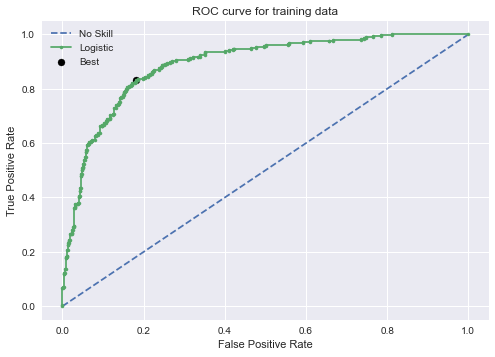

In [35]:
train_prob = logreg.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 88.3 percent
Best Threshold=0.341133, G-Mean=0.819


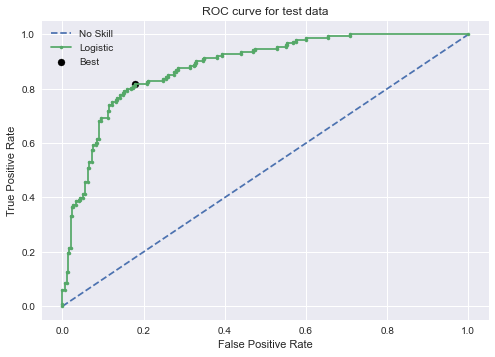

In [36]:
test_prob = logreg.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

### Model Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

#### GridSearchCV original code
log_regGS = LogisticRegression()
param_grid = [
    { 'penalty' : ['l1','l2','elasticnet','none'],
      'C' : np.logspace(-6,2,100),
      'solver' : ['newton-cg','lbfgs','liblinear','sag','saga'],
      'max_iter' : [100,200,500,1000],
      'random_state' : [1],
      'multi_class' : ['auto', 'ovr', 'multinomial'],
      'verbose' : [1],
      'n_jobs' : [2],
      'tol' : [0.01,0.001,0.0001,0.00001]
    }
]

log_reg = GridSearchCV(log_regGS, param_grid = param_grid, cv=5, verbose = True, n_jobs=2)
logreg = log_reg.fit(X_train,y_train)

#### GridSearcCV output
Fitting 5 folds for each of 96000 candidates, totalling 480000 fits
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 236 tasks      | elapsed:    8.3s
[Parallel(n_jobs=2)]: Done 1316 tasks      | elapsed:   35.5s
[Parallel(n_jobs=2)]: Done 3002 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 5352 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 8796 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 12912 tasks      | elapsed:  5.5min
[Parallel(n_jobs=2)]: Done 17844 tasks      | elapsed:  7.5min
[Parallel(n_jobs=2)]: Done 23480 tasks      | elapsed:  9.8min
[Parallel(n_jobs=2)]: Done 30224 tasks      | elapsed: 12.6min
[Parallel(n_jobs=2)]: Done 37616 tasks      | elapsed: 15.6min
[Parallel(n_jobs=2)]: Done 45618 tasks      | elapsed: 18.9min
[Parallel(n_jobs=2)]: Done 54384 tasks      | elapsed: 22.4min
[Parallel(n_jobs=2)]: Done 63824 tasks      | elapsed: 26.3min
[Parallel(n_jobs=2)]: Done 74224 tasks      | elapsed: 30.5min
[Parallel(n_jobs=2)]: Done 85152 tasks      | elapsed: 34.9min
[Parallel(n_jobs=2)]: Done 96804 tasks      | elapsed: 39.7min
[Parallel(n_jobs=2)]: Done 109312 tasks      | elapsed: 44.7min
[Parallel(n_jobs=2)]: Done 122426 tasks      | elapsed: 50.0min
[Parallel(n_jobs=2)]: Done 136480 tasks      | elapsed: 55.7min
[Parallel(n_jobs=2)]: Done 151188 tasks      | elapsed: 61.7min
[Parallel(n_jobs=2)]: Done 166652 tasks      | elapsed: 67.9min
[Parallel(n_jobs=2)]: Done 182896 tasks      | elapsed: 74.5min
[Parallel(n_jobs=2)]: Done 199888 tasks      | elapsed: 81.4min
[Parallel(n_jobs=2)]: Done 217592 tasks      | elapsed: 88.6min
[Parallel(n_jobs=2)]: Done 236018 tasks      | elapsed: 96.1min
[Parallel(n_jobs=2)]: Done 255254 tasks      | elapsed: 103.9min
[Parallel(n_jobs=2)]: Done 275248 tasks      | elapsed: 112.0min
[Parallel(n_jobs=2)]: Done 296018 tasks      | elapsed: 120.4min
[Parallel(n_jobs=2)]: Done 317592 tasks      | elapsed: 129.2min
[Parallel(n_jobs=2)]: Done 339888 tasks      | elapsed: 138.2min
[Parallel(n_jobs=2)]: Done 362896 tasks      | elapsed: 147.5min
[Parallel(n_jobs=2)]: Done 386652 tasks      | elapsed: 157.2min
[Parallel(n_jobs=2)]: Done 411188 tasks      | elapsed: 167.2min
[Parallel(n_jobs=2)]: Done 436480 tasks      | elapsed: 177.4min
[Parallel(n_jobs=2)]: Done 462426 tasks      | elapsed: 188.0min
[Parallel(n_jobs=2)]: Done 480000 out of 480000 | elapsed: 195.1min finished
[LibLinear]

logreg.best_estimator_

LogisticRegression(C=0.08497534359086456, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=2, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.01, verbose=1,
                   warm_start=False)

In [38]:
logreg = LogisticRegression(C=0.08497534359086456, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=4, penalty='l1', random_state=1, solver='liblinear', tol=0.01, verbose=1, warm_start=False)
logreg.fit(X_train,y_train)
logreg

[LibLinear]

LogisticRegression(C=0.08497534359086456, n_jobs=4, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.01, verbose=1)

In [39]:
ytrain_predict = logreg.predict(X_train)
ytest_predict = logreg.predict(X_test)

#Train data Confusion Matrix
print('Logistic Regression stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (logreg.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Logistic Regression stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (logreg.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Logistic Regression stats on train data:
[[696  58]
 [112 195]]
Accuracy score : 84.0 percent
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       754
           1       0.77      0.64      0.70       307

    accuracy                           0.84      1061
   macro avg       0.82      0.78      0.79      1061
weighted avg       0.84      0.84      0.83      1061



Logistic Regression stats on test data:
[[269  34]
 [ 44 109]]
Accuracy score : 82.9 percent
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       303
           1       0.76      0.71      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



Area under ROC : 88.9 percent
Best Threshold=0.284356, G-Mean=0.828


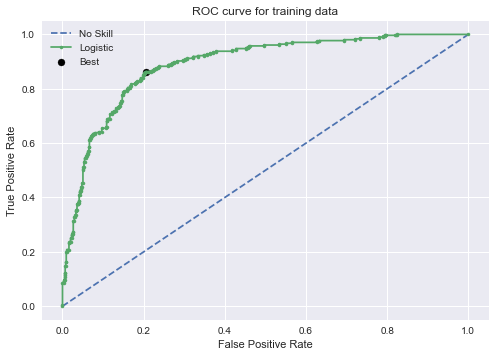

In [40]:
train_prob = logreg.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 88.2 percent
Best Threshold=0.396725, G-Mean=0.827


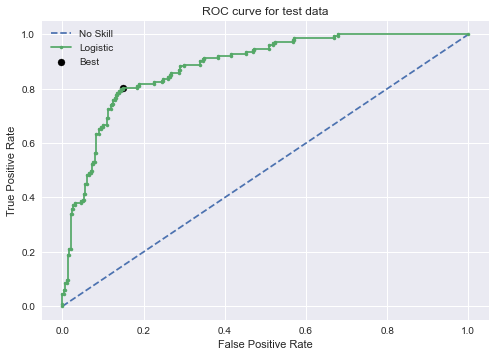

In [41]:
test_prob = logreg.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

## Linear Discriminant Analysis

Base model

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda

LinearDiscriminantAnalysis()

In [43]:
ytrain_predict = lda.predict(X_train)
ytest_predict = lda.predict(X_test)

#Train data Confusion Matrix
print('Linear Discriminant Analysis stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (lda.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Linear Discriminant Analysis stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (lda.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Linear Discriminant Analysis stats on train data:
[[685  69]
 [107 200]]
Accuracy score : 83.4 percent
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Linear Discriminant Analysis stats on test data:
[[269  34]
 [ 42 111]]
Accuracy score : 83.3 percent
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



Area under ROC : 88.9 percent
Best Threshold=0.295543, G-Mean=0.832


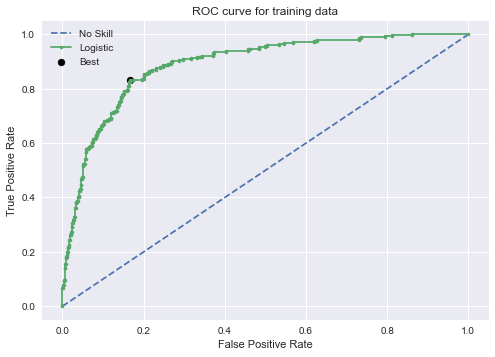

In [44]:
train_prob = lda.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 88.8 percent
Best Threshold=0.362551, G-Mean=0.826


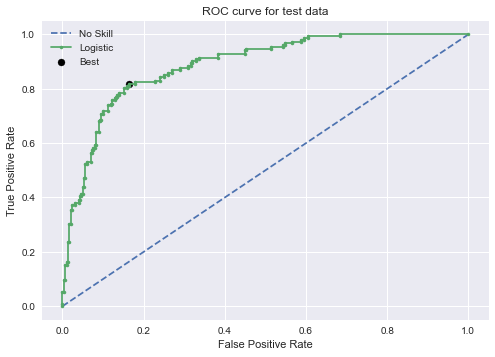

In [45]:
test_prob = lda.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

### Model Tuning

In [46]:
lda_gs = LinearDiscriminantAnalysis()
param_grid = [
    { 
      'solver' : ['svd','lsqr','eigen']
    }
]

l_d_a = GridSearchCV(lda_gs, param_grid = param_grid, cv=5, verbose = True, n_jobs=4)
lda = l_d_a.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [47]:
ytrain_predict = lda.predict(X_train)
ytest_predict = lda.predict(X_test)

#Train data Confusion Matrix
print('Linear Discriminant Analysis stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (lda.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Linear Discriminant Analysis stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (lda.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Linear Discriminant Analysis stats on train data:
[[685  69]
 [107 200]]
Accuracy score : 83.4 percent
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Linear Discriminant Analysis stats on test data:
[[269  34]
 [ 42 111]]
Accuracy score : 83.3 percent
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



Area under ROC : 88.9 percent
Best Threshold=0.295543, G-Mean=0.832


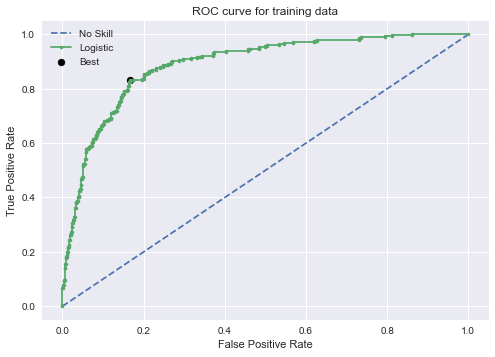

In [48]:
train_prob = lda.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 88.8 percent
Best Threshold=0.362551, G-Mean=0.826


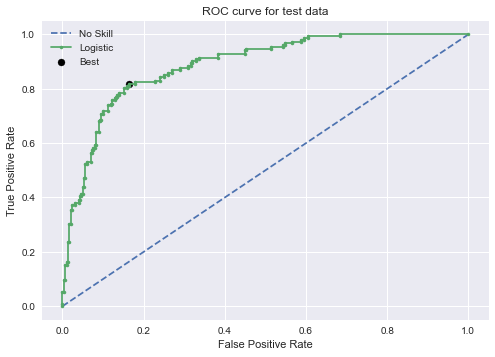

In [49]:
test_prob = lda.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

## KNN

Base model

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn

KNeighborsClassifier()

In [51]:
ytrain_predict = knn.predict(X_train)
ytest_predict = knn.predict(X_test)

#Train data Confusion Matrix
print('K-nearest Neighbors stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (knn.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('K-nearest Neighbors stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (knn.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

K-nearest Neighbors stats on train data:
[[690  64]
 [ 89 218]]
Accuracy score : 85.6 percent
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       754
           1       0.77      0.71      0.74       307

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



K-nearest Neighbors stats on test data:
[[271  32]
 [ 48 105]]
Accuracy score : 82.5 percent
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       303
           1       0.77      0.69      0.72       153

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



Area under ROC : 92.7 percent
Best Threshold=0.400000, G-Mean=0.845


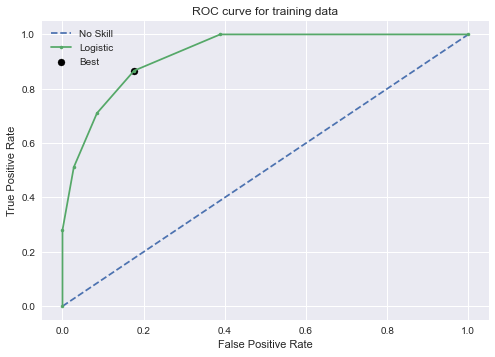

In [52]:
train_prob = knn.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 87.0 percent
Best Threshold=0.400000, G-Mean=0.799


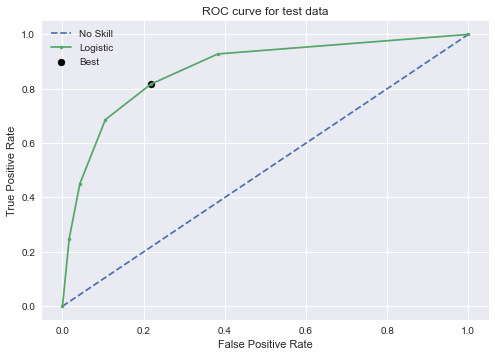

In [53]:
test_prob = knn.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

Model Tuning

In [54]:
knn_gs = KNeighborsClassifier()
param_grid = [
    { 
      'n_neighbors' : [5,10,15,20],
      'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
      'leaf_size' : [20,25,30,40,50],
      'p' : [1,2],
      'n_jobs' : [4]
    }
]

kn_n = GridSearchCV(knn_gs, param_grid = param_grid, cv=5, verbose = True, n_jobs=4)
knn = kn_n.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [55]:
ytrain_predict = knn.predict(X_train)
ytest_predict = knn.predict(X_test)

#Train data Confusion Matrix
print('K-nearest Neighbors stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (knn.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('K-nearest Neighbors stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (knn.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

K-nearest Neighbors stats on train data:
[[698  56]
 [116 191]]
Accuracy score : 83.8 percent
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       754
           1       0.77      0.62      0.69       307

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



K-nearest Neighbors stats on test data:
[[278  25]
 [ 52 101]]
Accuracy score : 83.1 percent
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       303
           1       0.80      0.66      0.72       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Area under ROC : 90.1 percent
Best Threshold=0.300000, G-Mean=0.820


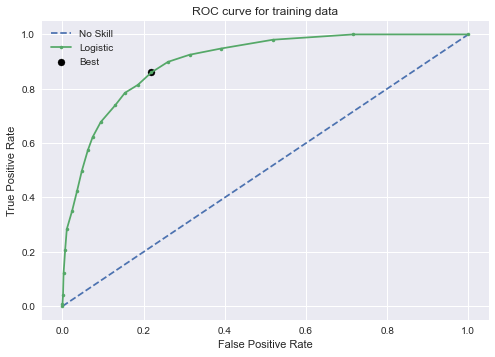

In [56]:
train_prob = knn.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 88.6 percent
Best Threshold=0.400000, G-Mean=0.832


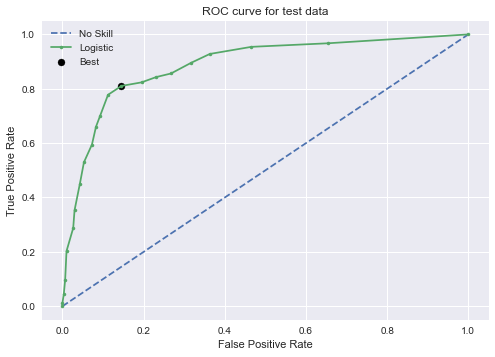

In [57]:
test_prob = knn.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

## Naive Bayes

Base model

In [58]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [59]:
ytrain_predict = nb.predict(X_train)
ytest_predict = nb.predict(X_test)

#Train data Confusion Matrix
print('Naive Bayes stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (nb.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Naive Bayes stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (nb.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Naive Bayes stats on train data:
[[668  86]
 [ 95 212]]
Accuracy score : 82.9 percent
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       754
           1       0.71      0.69      0.70       307

    accuracy                           0.83      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Naive Bayes stats on test data:
[[263  40]
 [ 40 113]]
Accuracy score : 82.5 percent
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.74      0.74       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Area under ROC : 88.8 percent
Best Threshold=0.241994, G-Mean=0.818


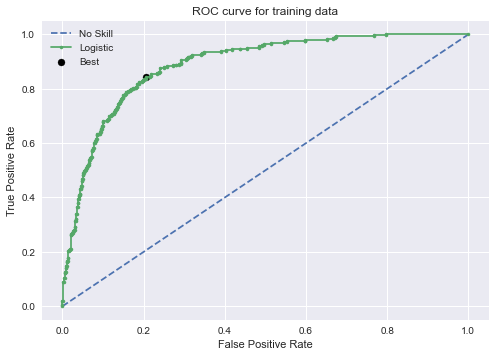

In [60]:
train_prob = nb.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 87.5 percent
Best Threshold=0.349038, G-Mean=0.810


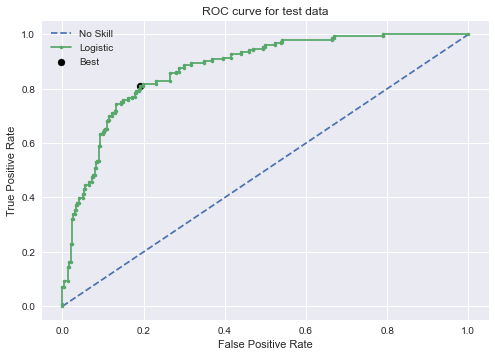

In [61]:
test_prob = nb.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

Model Tuning

In [62]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=1)

n_b_gs = GaussianNB()
param_grid = [
    {'var_smoothing': np.logspace(0,-9,100)}
]

n_b = GridSearchCV(estimator=n_b_gs, param_grid = param_grid, cv=cv_method, verbose = True, n_jobs=4)
nb = n_b.fit(X_train,y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [63]:
ytrain_predict = nb.predict(X_train)
ytest_predict = nb.predict(X_test)

#Train data Confusion Matrix
print('Naive Bayes stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (nb.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Naive Bayes stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (nb.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Naive Bayes stats on train data:
[[668  86]
 [ 95 212]]
Accuracy score : 82.9 percent
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       754
           1       0.71      0.69      0.70       307

    accuracy                           0.83      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Naive Bayes stats on test data:
[[263  40]
 [ 40 113]]
Accuracy score : 82.5 percent
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.74      0.74       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Area under ROC : 88.8 percent
Best Threshold=0.242178, G-Mean=0.818


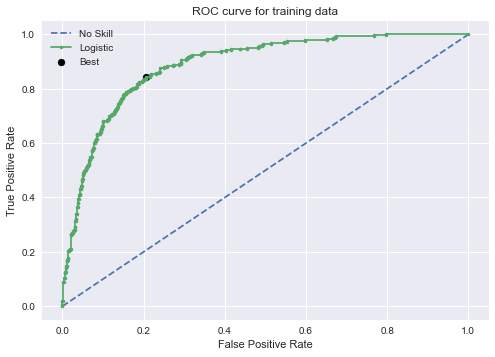

In [64]:
train_prob = nb.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 87.5 percent
Best Threshold=0.348970, G-Mean=0.810


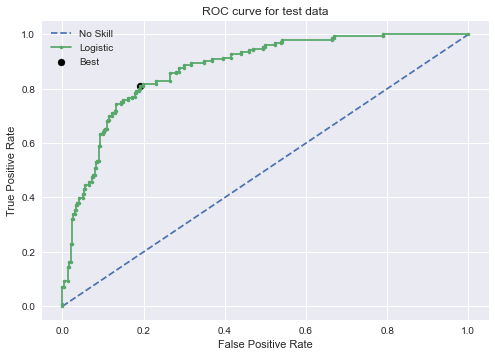

In [65]:
test_prob = nb.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

## Bagging

Base model

In [66]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bag = BaggingClassifier(base_estimator=RandomForestClassifier())
bag.fit(X_train, y_train)
bag

BaggingClassifier(base_estimator=RandomForestClassifier())

In [67]:
ytrain_predict = bag.predict(X_train)
ytest_predict = bag.predict(X_test)

#Train data Confusion Matrix
print('Bagging-Random Forest stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (bag.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Bagging-Random Forest stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (bag.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Bagging-Random Forest stats on train data:
[[747   7]
 [ 24 283]]
Accuracy score : 97.1 percent
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       754
           1       0.98      0.92      0.95       307

    accuracy                           0.97      1061
   macro avg       0.97      0.96      0.96      1061
weighted avg       0.97      0.97      0.97      1061



Bagging-Random Forest stats on test data:
[[275  28]
 [ 51 102]]
Accuracy score : 82.7 percent
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       303
           1       0.78      0.67      0.72       153

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



Area under ROC : 99.6 percent
Best Threshold=0.448000, G-Mean=0.966


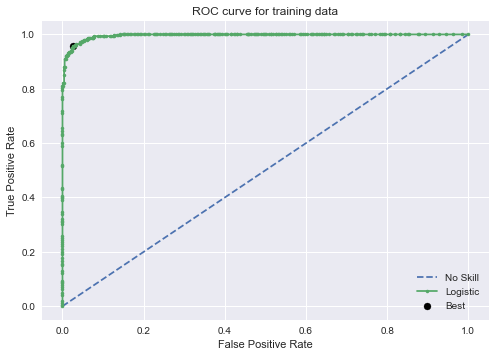

In [68]:
train_prob = bag.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 89.6 percent
Best Threshold=0.305000, G-Mean=0.837


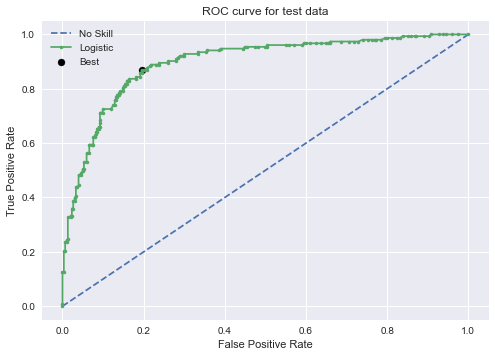

In [69]:
test_prob = bag.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

Model Tuning

In [70]:
cv_method = RepeatedStratifiedKFold(n_splits=3,  n_repeats=2, random_state=1)

bag_gs = BaggingClassifier(base_estimator=RandomForestClassifier())
param_grid = [
    {
     'n_estimators' : [8,10,12],
     'max_samples'  : [30,40,50,60],
     'max_features' : [3],
     'bootstrap' : [True,False],
     'bootstrap_features' : [True,False],
     'oob_score' : [True,False],
     'n_jobs' : [-1],
     'random_state' : [1],
     'verbose' : [True]}
]

bag_c = GridSearchCV(estimator=bag_gs, param_grid = param_grid, cv=cv_method, verbose = True, n_jobs=-1)
bag = bag_c.fit(X_train,y_train)

Fitting 6 folds for each of 96 candidates, totalling 576 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.3s finished


In [71]:
bag_c.best_estimator_

BaggingClassifier(base_estimator=RandomForestClassifier(), bootstrap=False,
                  bootstrap_features=True, max_features=3, max_samples=60,
                  n_jobs=-1, random_state=1, verbose=True)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=100,
                                                        n_jobs=None,
                                                        oob_score=False,
                                                        random_state=None,
                                                        verbose=0,
                                                        warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=3,
                  max_samples=50, n_estimators=8, n_jobs=2, oob_score=False,
                  random_state=1, verbose=True, warm_start=False)

In [72]:
ytrain_predict = bag.predict(X_train)
ytest_predict = bag.predict(X_test)

#Train data Confusion Matrix
print('Bagging-Random Forest stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (bag.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Bagging-Random Forest stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (bag.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s


Bagging-Random Forest stats on train data:
[[719  35]
 [185 122]]


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


Accuracy score : 79.3 percent
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       754
           1       0.78      0.40      0.53       307

    accuracy                           0.79      1061
   macro avg       0.79      0.68      0.70      1061
weighted avg       0.79      0.79      0.77      1061



Bagging-Random Forest stats on test data:
[[281  22]
 [ 90  63]]
Accuracy score : 75.4 percent
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       303
           1       0.74      0.41      0.53       153

    accuracy                           0.75       456
   macro avg       0.75      0.67      0.68       456
weighted avg       0.75      0.75      0.73       456



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


Area under ROC : 87.6 percent
Best Threshold=0.326323, G-Mean=0.815


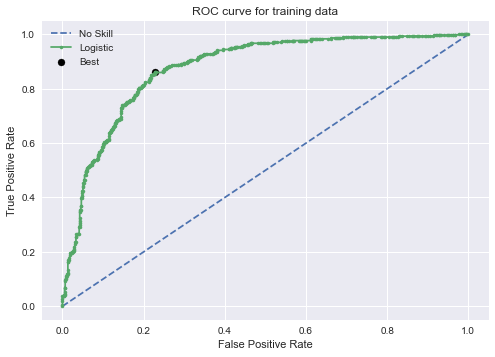

In [73]:
train_prob = bag.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


Area under ROC : 82.8 percent
Best Threshold=0.294280, G-Mean=0.788


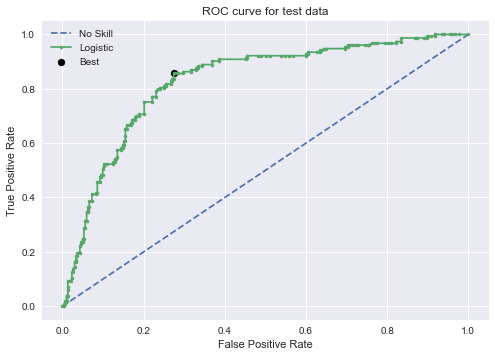

In [74]:
test_prob = bag.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

## Boosting

#### Gradient boost
Base model

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier()
boost.fit(X_train, y_train)
boost

GradientBoostingClassifier()

In [86]:
ytrain_predict = boost.predict(X_train)
ytest_predict = boost.predict(X_test)

#Train data Confusion Matrix
print('Gradient Boost stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (boost.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Gradient Boost stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (boost.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Gradient Boost stats on train data:
[[707  47]
 [ 81 226]]
Accuracy score : 87.9 percent
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       754
           1       0.83      0.74      0.78       307

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



Gradient Boost stats on test data:
[[273  30]
 [ 46 107]]
Accuracy score : 83.3 percent
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       303
           1       0.78      0.70      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



Area under ROC : 95.1 percent
Best Threshold=0.331376, G-Mean=0.885


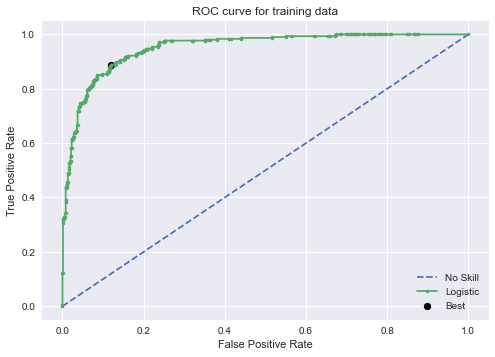

In [77]:
train_prob = boost.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 89.9 percent
Best Threshold=0.262830, G-Mean=0.825


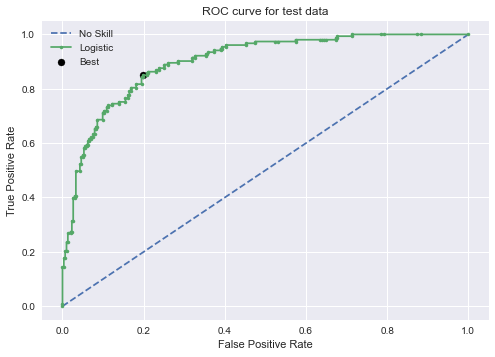

In [78]:
test_prob = boost.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

Model Tuning

In [79]:
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=1)

boost_gs = GradientBoostingClassifier()
param_grid = [
    {
     'loss' : ['deviance','exponential'],
     #'learning_rate' : [0.1,0.01,0.001],
     'n_estimators' : [80,100,120,200],
     'subsample' : [0.6,0.8,1],
     'criterion' : ['friedman_mse','mse'],
     'min_samples_split' : [2,6,10,30],
     'random_state' : [1],
     'max_features' : ['sqrt','log2'],
     #'tol' : [0.1,0.01,0.001,0.0001]
     'verbose' : [True]
    }
]

boost_c = GridSearchCV(estimator=boost_gs, param_grid = param_grid, cv=cv_method, verbose = True, n_jobs=-1)
boost = boost_c.fit(X_train,y_train)

Fitting 15 folds for each of 384 candidates, totalling 5760 fits
      Iter       Train Loss   Remaining Time 
         1           0.8766            0.00s
         2           0.8462            0.00s
         3           0.8203            0.00s
         4           0.7994            0.00s
         5           0.7751            0.00s
         6           0.7585            0.00s
         7           0.7401            0.00s
         8           0.7246            0.00s
         9           0.7120            0.00s
        10           0.7016            0.00s
        20           0.6257            0.05s
        30           0.5869            0.05s
        40           0.5614            0.03s
        50           0.5436            0.03s
        60           0.5285            0.02s
        70           0.5172            0.01s
        80           0.5055            0.00s


In [80]:
boost.best_estimator_

GradientBoostingClassifier(criterion='mse', loss='exponential',
                           max_features='sqrt', min_samples_split=10,
                           n_estimators=80, random_state=1, subsample=1,
                           verbose=True)

In [81]:
ytrain_predict = boost.predict(X_train)
ytest_predict = boost.predict(X_test)

#Train data Confusion Matrix
print('Gradient Boost stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (boost.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Gradient Boost stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (boost.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Gradient Boost stats on train data:
[[707  47]
 [ 81 226]]
Accuracy score : 87.9 percent
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       754
           1       0.83      0.74      0.78       307

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



Gradient Boost stats on test data:
[[273  30]
 [ 46 107]]
Accuracy score : 83.3 percent
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       303
           1       0.78      0.70      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



Area under ROC : 93.9 percent
Best Threshold=0.329897, G-Mean=0.865


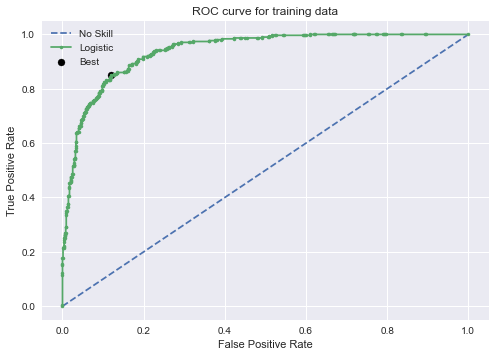

In [82]:
train_prob = boost.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 90.1 percent
Best Threshold=0.256968, G-Mean=0.835


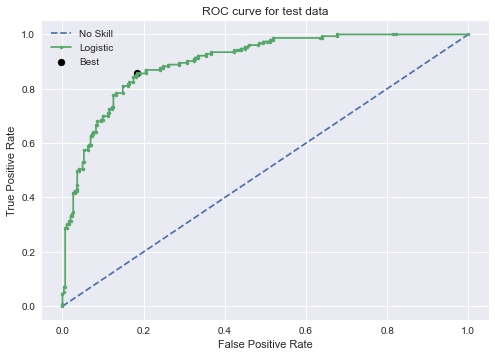

In [83]:
test_prob = boost.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

#### Adaboost
Base model

In [97]:
from sklearn.ensemble import AdaBoostClassifier

aboost = AdaBoostClassifier(base_estimator=RandomForestClassifier())
aboost.fit(X_train, y_train)
aboost

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [98]:
ytrain_predict = aboost.predict(X_train)
ytest_predict = aboost.predict(X_test)

#Train data Confusion Matrix
print('Adaboost stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (aboost.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Adaboost stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (aboost.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Adaboost stats on train data:
[[754   0]
 [  0 307]]
Accuracy score : 100.0 percent
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



Adaboost stats on test data:
[[276  27]
 [ 51 102]]
Accuracy score : 82.9 percent
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       303
           1       0.79      0.67      0.72       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



Area under ROC : 100.0 percent
Best Threshold=0.731059, G-Mean=1.000


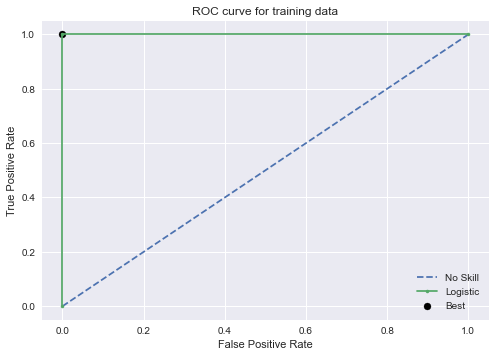

In [107]:
train_prob = aboost.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 78.9 percent
Best Threshold=0.731059, G-Mean=0.780


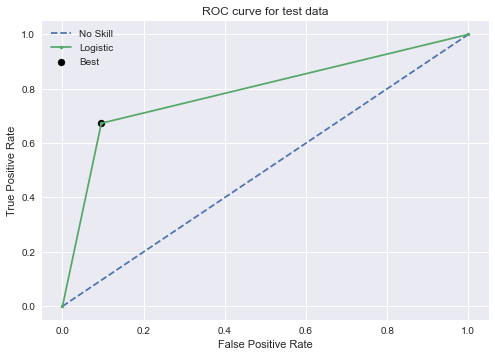

In [108]:
test_prob = aboost.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

Model Tuning

In [101]:
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=1)

aboost_gs = AdaBoostClassifier(base_estimator=RandomForestClassifier())
param_grid = [
    {
     'learning_rate' : [1,1.2,1.5,1.8],
     'n_estimators' : [30,50,80,100,120],
     'algorithm' : ['SAMME','SAMME.R'],
     'random_state' : [1]
    }
]

aboost_c = GridSearchCV(estimator=aboost_gs, param_grid = param_grid, cv=cv_method, verbose = True, n_jobs=-1)
aboost = aboost_c.fit(X_train,y_train)

Fitting 15 folds for each of 40 candidates, totalling 600 fits


In [102]:
aboost.best_estimator_

AdaBoostClassifier(algorithm='SAMME', base_estimator=RandomForestClassifier(),
                   learning_rate=1, n_estimators=30, random_state=1)

In [103]:
ytrain_predict = aboost.predict(X_train)
ytest_predict = aboost.predict(X_test)

#Train data Confusion Matrix
print('Adaboost stats on train data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (aboost.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Adaboost stats on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (aboost.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Adaboost stats on train data:
[[754   0]
 [  0 307]]
Accuracy score : 100.0 percent
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



Adaboost stats on test data:
[[274  29]
 [ 50 103]]
Accuracy score : 82.7 percent
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       303
           1       0.78      0.67      0.72       153

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



Area under ROC : 100.0 percent
Best Threshold=0.731059, G-Mean=1.000


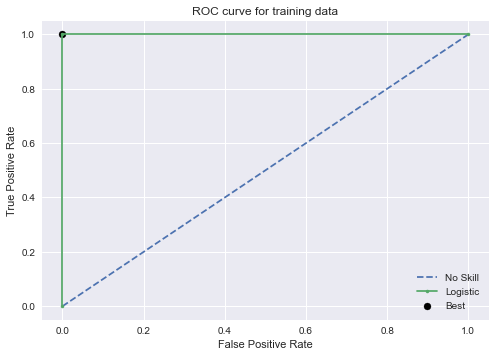

In [104]:
train_prob = aboost.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 78.9 percent
Best Threshold=0.731059, G-Mean=0.780


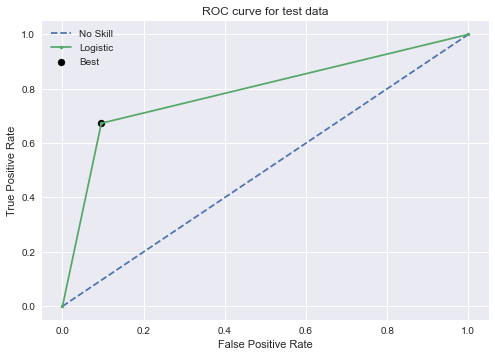

In [105]:
test_prob = aboost.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

In [106]:
end_time = datetime.now()

print('Excecution ended at {}'.format(end_time))

print('Total runtime is {}'.format(end_time-start_time))

Excecution ended at 2021-07-25 06:28:35.277687
Total runtime is 0:10:36.709970
